<a href="https://colab.research.google.com/github/Brudeoli17/Projeto-Marcus/blob/main/Analise_dos_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np 


In [2]:
from google.colab import drive

In [4]:
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Data/Rotas.csv', low_memory=False, sep=';', encoding='UTF-8')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df_cl = pd.read_csv('/content/drive/MyDrive/Data/Clientes.csv', low_memory=False, sep=';', encoding='UTF-8')

In [6]:
df_fa = pd.read_csv('/content/drive/MyDrive/Data/Fabricas.csv', low_memory=False, sep=';', encoding='UTF-8')

In [7]:
df.head(2)

,Dt.Fat,Dt.Entrega,Mes.Base,Ano.Exec,CO.Fabrica,CO.Cliente,Tp.Operacao,Incoterm,Veiculo,Qtd.Transp,Moeda,Vlr.Frete
0,44200,44209,Jan,2021,3423909,2303,VD,CIF,P12,1800,BRL,6000
1,44210,44218,Jan,2021,3403208,2302,VD,FOB,P12,1600,BRL,0


In [10]:
df_cl.head(2)

,CO.Cliente,MUN,LAT,LONG
0,2301,VALINHOS,2295188,4702779
1,2302,CAMPINAS,2289429,4705822


In [ ]:
df['CO.Cliente'].value_counts()

In [11]:
df_fa.head(2)

,CO.Fabrica,NO_MUN,NO_MUN_MIN,SG_UF
0,3423909,ITU,Itu,SP
1,3403208,ARARAQUARA,Araraquara,SP


In [12]:
df_m = pd.merge(df, df_cl, how = 'outer', on = 'CO.Cliente')

In [13]:
df_m.head(5)

,Dt.Fat,Dt.Entrega,Mes.Base,Ano.Exec,CO.Fabrica,CO.Cliente,Tp.Operacao,Incoterm,Veiculo,Qtd.Transp,Moeda,Vlr.Frete,MUN,LAT,LONG
0,44200,44209,Jan,2021,3423909,2303,VD,CIF,P12,1800,BRL,6000,CAMPINAS,2292634,4703974
1,44212,44214,Jan,2021,3403208,2303,VD,FOB,P12,1800,BRL,0,CAMPINAS,2292634,4703974
2,44214,44222,Jan,2021,3423909,2303,VD,FOB,P12,1600,BRL,0,CAMPINAS,2292634,4703974
3,44215,44219,Jan,2021,3423909,2303,VD,FOB,P12,1800,BRL,0,CAMPINAS,2292634,4703974
4,44217,44228,Jan,2021,3403208,2303,VD,FOB,P12,1200,BRL,0,CAMPINAS,2292634,4703974


In [14]:
df_fa['CO.Fabrica'] = df_fa['CO.Fabrica'].astype('str')  


In [ ]:
df_fa.info()

In [16]:
df_fi = pd.merge(df_m, df_fa, how = 'outer', on = 'CO.Fabrica')

In [17]:
df_fi.head()

,Dt.Fat,Dt.Entrega,Mes.Base,Ano.Exec,CO.Fabrica,CO.Cliente,Tp.Operacao,Incoterm,Veiculo,Qtd.Transp,Moeda,Vlr.Frete,MUN,LAT,LONG,NO_MUN,NO_MUN_MIN,SG_UF
0,44200,44209,Jan,2021,3423909,2303,VD,CIF,P12,1800,BRL,6000,CAMPINAS,2292634,4703974,ITU,Itu,SP
1,44214,44222,Jan,2021,3423909,2303,VD,FOB,P12,1600,BRL,0,CAMPINAS,2292634,4703974,ITU,Itu,SP
2,44215,44219,Jan,2021,3423909,2303,VD,FOB,P12,1800,BRL,0,CAMPINAS,2292634,4703974,ITU,Itu,SP
3,44205,44205,Jan,2021,3423909,2303,VD,FOB,P12,1200,BRL,0,CAMPINAS,2292634,4703974,ITU,Itu,SP
4,44210,44219,Jan,2021,3423909,2303,VD,FOB,P12,1200,BRL,0,CAMPINAS,2292634,4703974,ITU,Itu,SP


In [ ]:
df_fa.info()

In [ ]:
df.groupby("Ano.Exec").size()



In [ ]:
df_fi()

In [ ]:

lista_valida = ['2019', '2020', '2021']
valores_invalidos = [valor for valor in df['Ano.Exec'] if valor not in lista_valida]
# Mostra os valores inválidos na tela
if valores_invalidos:
    print("Os seguintes valores não são válidos: {', '.join(valores_invalidos)}")
else:
    print('Todos os valores da coluna estão na lista válida.')



In [ ]:
# Cria um novo DataFrame apenas com os valores inválidos
df_erros = df.loc[df['Ano.Exec'].isin(valores_invalidos)]

# Exporta o DataFrame de erros para um arquivo Excel separado
df_erros.to_excel('Erros_Ano.xlsx', index=False)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df.groupby("Mes.Base").size()



In [91]:
# Soma dos valores encontrados na planilha 
df.groupby("CO.Fabrica").size()

CO.Fabrica
3403208    39786
3423909    39828
3424402    40373
????           4
dtype: int64

In [92]:
#Exportação dos erros da planilha
if pd.to_numeric(df['CO.Fabrica'], errors='coerce').notnull().all():
    print('Todos os valores são numéricos.')
else:
    print('Existem valores não numéricos na coluna.')

#Cria um novo DataFrame apenas com os valores inválidos
df_erros = df.loc[df['CO.Fabrica'].isin(valores_invalidos)]

# Exporta o DataFrame de erros para um arquivo Excel separado
df_erros.to_excel('erros_fabricas.xlsx', index=False)

Existem valores não numéricos na coluna.


In [ ]:
df.groupby("CO.Cliente").size()


In [ ]:
#Inconsistencias_na_moeda
df.groupby("Moeda").size()

Moeda
???         3
BR          2
BRL    119992
dtype: int64

In [94]:

df.query('`CO.Fabrica` == "2303"').groupby('Qtd.Transp').size()


Series([], dtype: int64)

In [95]:
#Analise_das_datas_de_faturamento_e_entrega
df['Result'] = df['Dt.Fat'] .sub (df['Dt.Entrega'])

print(df[['Dt.Fat', 'Dt.Entrega', 'Result']])

df_negativo = df[df['Result'] < 0]

# Exporta as linhas filtradas em um arquivo Excel
df_negativo.to_excel('resultados_negativos.xlsx', index=False)

        Dt.Fat  Dt.Entrega  Result
0        44200       44209      -9
1        44210       44218      -8
2        44211       44210       1
3        44211       44216      -5
4        44212       44219      -7
...        ...         ...     ...
119995   44537       44540      -3
119996   44537       44542      -5
119997   44536       44546     -10
119998   44545       44545       0
119999   44544       44546      -2

[120000 rows x 3 columns]


In [ ]:

lista_valida = ['Jan', 'Fev', 'Mar','Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
valores_invalidos = [valor for valor in df['Mes.Base'] if valor not in lista_valida]
# Mostra os valores inválidos na tela
if valores_invalidos:
    print(f"Os seguintes valores não são válidos: {', '.join(valores_invalidos)}")
else:
    print('Todos os valores da coluna estão na lista válida.')

# Cria um novo DataFrame apenas com os valores inválidos
df_erros = df.loc[df['Mes.Base'].isin(valores_invalidos)]

# Exporta o DataFrame de erros para um arquivo Excel separado
df_erros.to_excel('erros.xlsx', index=False)

Os seguintes valores não são válidos: 4, 4, 5, 11, 11


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
coluna1 = df['Tp.Operacao']
coluna2 = df['Qtd.Transp']
plt.bar(coluna1, coluna2)

plt.title("Vendas e Devoluções Efetuadas")
plt.xlabel("Tipo de Operação")
plt.ylabel("Quatiddade Transportada")

plt.show()

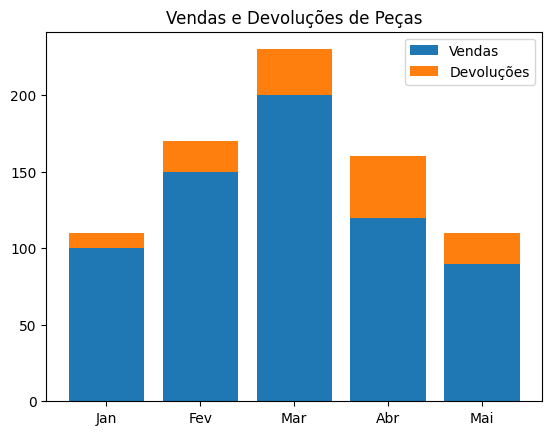

In [19]:
import matplotlib.pyplot as plt

# Dados
vendas = [100, 150, 200, 120, 90]
devolucoes = [10, 20, 30, 40, 20]
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai']

# Criando o gráfico de barras empilhadas
fig, ax = plt.subplots()
ax.bar(meses, vendas, label='Vendas')
ax.bar(meses, devolucoes, bottom=vendas, label='Devoluções')

# Adicionando título e legendas
ax.set_title('Vendas e Devoluções de Peças')
ax.legend()

# Exibindo o gráfico
plt.show()

In [ ]:
import matplotlib.pyplot as plt

rota_1 = [(10, 20), (30, 40), (50, 60)]
rota_2 = [(15, 25), (35, 45), (55, 65)]
rota_3 = [(20, 30), (40, 50), (60, 70)]

plt.scatter(*zip(*rota_1), label='Rota 1')
plt.scatter(*zip(*rota_2), label='Rota 2')
plt.scatter(*zip(*rota_3), label='Rota 3')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Localização das Entregas por Rota')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

rotas = ['Rota 1', 'Rota 2', 'Rota 3', 'Rota 4']
entregas_semana_1 = [15, 25, 10, 30]
entregas_semana_2 = [20, 30, 15, 35]

plt.plot(rotas, entregas_semana_1, label='Semana 1')
plt.plot(rotas, entregas_semana_2, label='Semana 2')
plt.xlabel('Rotas')
plt.ylabel('Quantidade de Entregas')
plt.title('Evolução da Quantidade de Entregas por Rota')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

rotas = ['Rota 1', 'Rota 2', 'Rota 3', 'Rota 4']
entregas = [15, 25, 10, 30]

plt.pie(entregas, labels=rotas, autopct='%1.1f%%')
plt.title('Proporção de Entregas por Rota')
plt.show()

In [ ]:
import pandas as pd

In [ ]:
import plotly.graph_objs as go

In [ ]:
import dash

In [ ]:
import dash_core_components as dcc

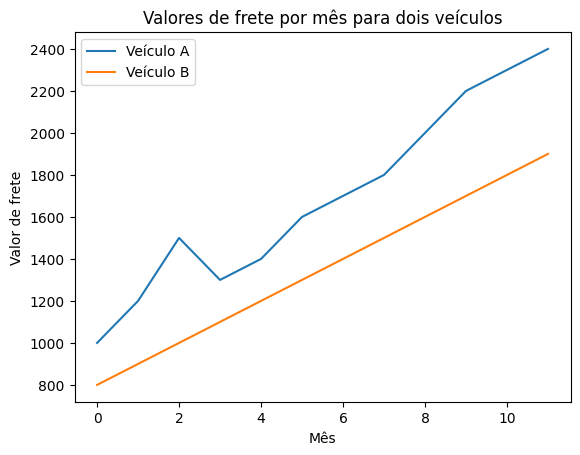

In [18]:
import matplotlib.pyplot as plt

veiculo_a = [1000, 1200, 1500, 1300, 1400, 1600, 1700, 1800, 2000, 2200, 2300, 2400]
veiculo_b = [800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900]

plt.plot(veiculo_a, label='Veículo A')
plt.plot(veiculo_b, label='Veículo B')
plt.legend()
plt.title('Valores de frete por mês para dois veículos')
plt.xlabel('Mês')
plt.ylabel('Valor de frete')
plt.show()